In [120]:
import sys
import os
from time import time
sys.path.append("../../../../src/")
#Imports
import single_particle_sector as sps
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter

In [173]:
#Define Parameters
J = 1
Ls = [i for i in range(8,17,2)]
h_i = np.linspace(0.5,1.5,40)
n = 4



8
10
12
14
16


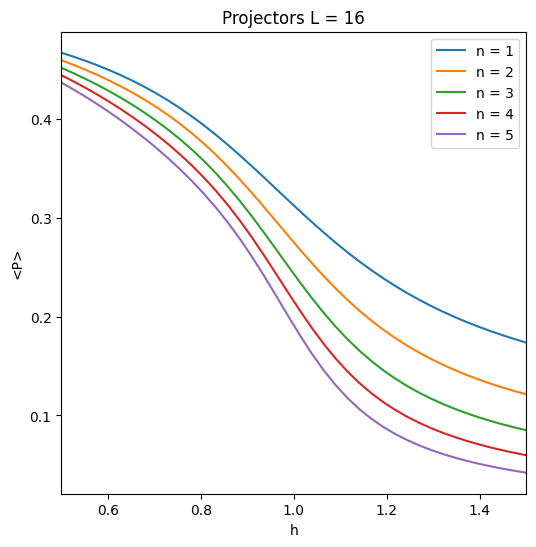

In [174]:
dat = []
dat2= []
for L in Ls:
    print(L)
    dat_n = []
    dat_n2= []
    for h in h_i:
        H = sps.H_bdg(h,L,J,"ABC")
        E,V = la.eigh(H)
        #The only sublety is this step
        #G_TFIM chooses ((1 0),(0 0 )) correlation structure (Ground states only)
        G = sps.G_tfim(V[:,L:])
        dat_n.append(sps.P_n(n,G,L))
        dat_n2.append(sps.P_n(2*n,G,L))
    dat2.append(np.array(dat_n2))    

    dat.append(np.array(dat_n))
    n+=1
l = 1
plt.figure(figsize=(6,6))

for d in dat:
    plot(h_i,d,label = f"n = {l}")
    l+=1
plt.legend()
plt.xlim(h_i[0],h_i[-1])
#plt.ylim(0,.5)
plt.title(f"Projectors L = {L}")
plt.xlabel("h")
plt.ylabel("<P>")
plt.show()

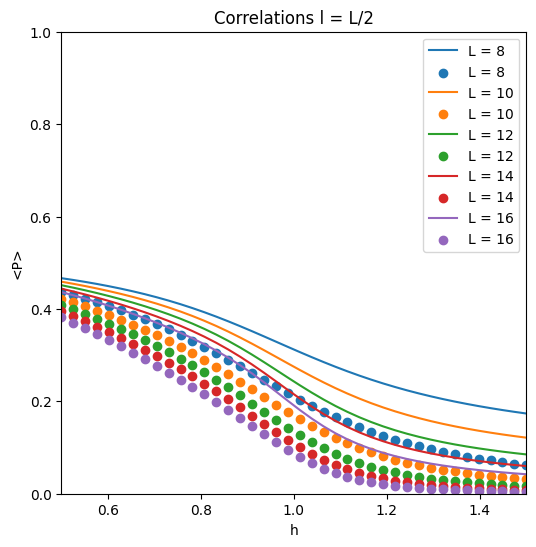

In [181]:
plt.figure(figsize=(6,6))
l = 0
for d in range(len(dat)):
    PN = np.array(dat[d])
    P2N= np.array(dat2[d])
    plot(h_i,dat[d],label = f"L = {Ls[l]}")
    scatter(h_i,dat2[d],label = f"L = {Ls[l]}")
    
    l+=1
plt.legend()
plt.xlim(h_i[0],h_i[-1])
#plt.ylim(0,.5)
plt.title(f"Correlations l = L/2")
plt.xlabel("h")
plt.ylabel("<P>")
#plt.yscale("log")
#plt.xlim(0,2)
plt.ylim(0,1)
#plt.savefig("Effect_of_lover2_on_Peak_I(AB).png")
plt.show()


In [136]:
L = 20
h = 0
J = 1
H = sps.H_bdg(h,L,J,"ABC")
E,V = la.eigh(H)
G = sps.G_tfim(V[:,L:])
ns = np.arange(1,20)


In [137]:
times = []
for n in ns:

    timer = time()
    sps.P_n(n,G,L)
    times.append(time()-timer)


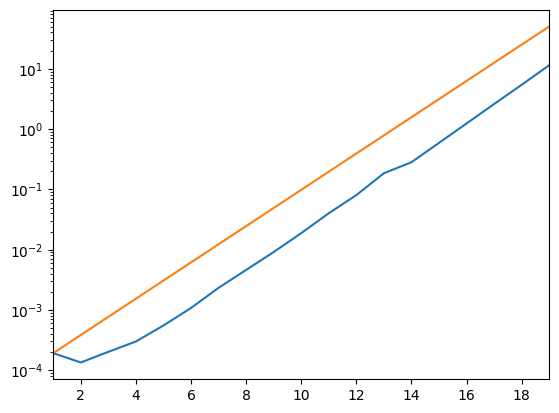

In [150]:
plot(ns,times)
ns = np.array(ns)
plot(ns,times[0]/2*2**ns)
plt.xlim(ns[0],ns[-1])
#plt.xscale("log")
plt.yscale("log")